<a href="https://colab.research.google.com/github/riyavincent/DATASTRUCTURE2040/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
data=load_iris()

In [3]:
data


{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
data.data.shape

(150, 4)

In [5]:
print('classes to predict',data.target_names)
print('Features:',data.feature_names)

classes to predict ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
x=data.data
y=data.target

In [7]:
display(x.shape,y.shape)

(150, 4)

(150,)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.tree import DecisionTreeClassifier
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=50,test_size=0.25)

In [10]:
classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred=classifier.predict(x_test)

In [12]:
from sklearn.metrics import accuracy_score
print('accuracy on train data using Gini:',accuracy_score(y_train,classifier.predict(x_train)))
print('accuracy on test data using Gini:',accuracy_score(y_test,y_pred))

accuracy on train data using Gini: 1.0
accuracy on test data using Gini: 0.9473684210526315


In [13]:
classifier_entropy=DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(x_train,y_train)
y_pred_entropy=classifier_entropy.predict(x_test)
print('accuracy on train data using entropy:',accuracy_score(y_train,classifier.predict(x_train)))
print('accuracy on test data using entropy:',accuracy_score(y_test,y_pred_entropy))

accuracy on train data using entropy: 1.0
accuracy on test data using entropy: 0.9473684210526315


In [14]:
classifier_entropy1=DecisionTreeClassifier(criterion='entropy')
classifier_entropy1.fit(x_train,y_train)
y_pred_entropy1=classifier_entropy.predict(x_test)
print('accuracy on train data using entropy:',accuracy_score(y_train,classifier.predict(x_train)))
print('accuracy on test data using entropy:',accuracy_score(y_test,y_pred_entropy1))

accuracy on train data using entropy: 1.0
accuracy on test data using entropy: 0.9473684210526315


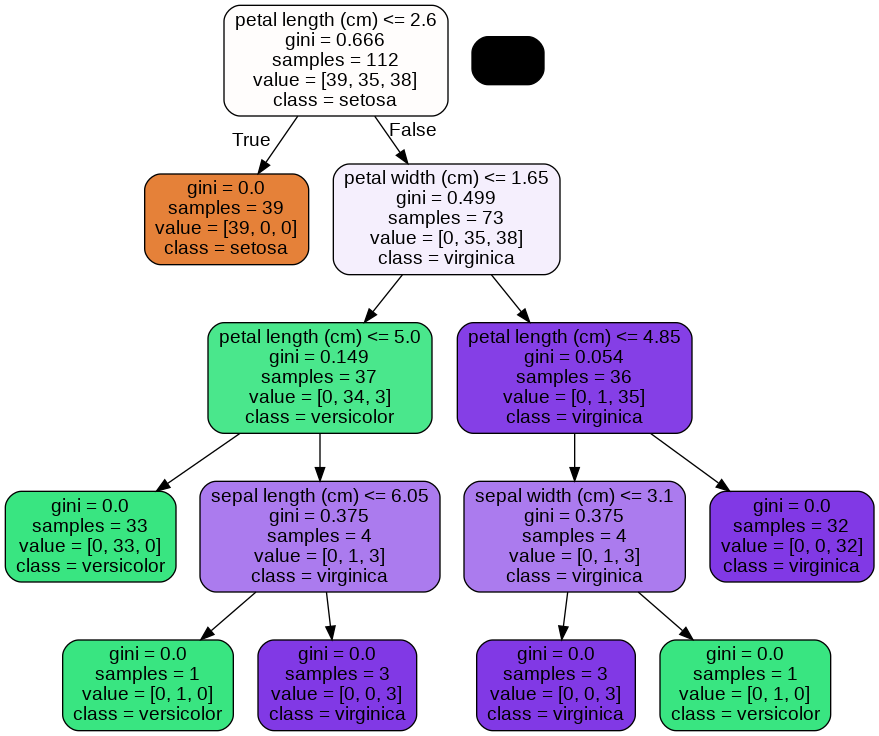

In [18]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data=StringIO()

export_graphviz(classifier,out_file=dot_data,filled=True,rounded=True,feature_names=data.feature_names,class_names=data.target_names)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())